In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Linear regression from scratch

In [84]:
class MyLinearRegression():
    def __init__(self, n_iter: int=1000, solver: str="analytical", alpha: float=0.01, lam: float=0.0):
        if solver not in ["analytical", "grad_descent"]:
            raise ValueError('Incorrect solver inputted. Choose either "analytical" or "grad_descent".')
        self.weights = None
        self.n_iter = n_iter
        self.solver = solver
        self.lam = lam
        self.alpha = alpha

    def fit(self, X, y):
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        if y.ndim > 2:
            raise ValueError("Target y has the wrong shape %s" % str(y.shape))

        ones = np.ones((len(y), 1))
        X = np.hstack((ones, X))

        if self.solver == "analytical":
            X_T = X.T
            I = np.identity(X.shape[1])
            I[0, 0] = 0  # Exclude intercept from regularization
            self.weights = np.linalg.pinv(X_T @ X + self.lam * I) @ X_T @ y
        else:
            self.weights = np.zeros((X.shape[1], 1))

            for _ in range(self.n_iter):
                y_pred = X @ self.weights
                reg_term = self.lam * self.weights
                reg_term[0] = 0     # Exclude intercept from regularization
                grad = 2/len(y) * (X.T @ (y_pred - y) + reg_term)
                self.weights -= self.alpha * grad

    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X))
        return X @ self.weights

    def score(self, X, y):
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        if y.ndim > 2:
            raise ValueError("Target y has the wrong shape %s" % str(y.shape))
        y_pred = self.predict(X)
        score = 1 - (((y - y_pred) ** 2).sum() / ((y - y.mean()) ** 2).sum())
        return score

# Generate dataset

In [85]:
np.random.seed(42)

In [86]:
X, y = make_regression(
    n_samples=1200,
    n_features=12,
    noise=10
)

# Creating models

In [87]:
model_no_reg_analyt = MyLinearRegression()
model_reg_grad_descent = MyLinearRegression(solver="grad_descent", lam=1)
lin_reg = LinearRegression()
ridge_reg = Ridge()

In [88]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### Compare models

In [89]:
model_no_reg_analyt.fit(X_train_normalized, y_train)
model_reg_grad_descent.fit(X_train_normalized, y_train)
lin_reg.fit(X_train_normalized, y_train)
ridge_reg.fit(X_train_normalized, y_train)

Ridge()

In [90]:
y_pred1 = model_no_reg_analyt.predict(X_test_normalized)
y_pred2 = model_reg_grad_descent.predict(X_test_normalized)
y_pred3 = lin_reg.predict(X_test_normalized)
y_pred4 = ridge_reg.predict(X_test_normalized)

In [91]:
predictions_dict = {"model_no_reg_analyt": y_pred1.flatten(),
                   "model_reg_grad_descent": y_pred2.flatten(),
                   "lin_reg": y_pred3.flatten(),
                   "ridge_reg": y_pred4.flatten()}
df = pd.DataFrame(predictions_dict)
df

,model_no_reg_analyt,model_reg_grad_descent,lin_reg,ridge_reg
0,-126.294765,-126.137350,-126.294765,-126.137357
1,-106.028006,-105.913514,-106.028006,-105.913516
2,243.162722,242.882812,243.162722,242.882822
3,47.004434,46.934488,47.004434,46.934497
4,111.106576,110.989342,111.106576,110.989341
...,...,...,...,...
235,-203.166285,-202.913692,-203.166285,-202.913704
236,-376.641917,-376.178709,-376.641917,-376.178724
237,-205.658515,-205.405551,-205.658515,-205.405560
238,135.375545,135.206633,135.375545,135.206642


In [92]:
score1 = model_no_reg_analyt.score(X_test_normalized, y_test)
score2 = model_reg_grad_descent.score(X_test_normalized, y_test)
score3 = lin_reg.score(X_test_normalized, y_test)
score4 = ridge_reg.score(X_test_normalized, y_test)

score_dict = {"Custom linear regression with analytical solution": score1,
             "Custom linear regression with gradient descent approach and regularization": score2,
             "Linear regression with analytical solution from sklearn": score3,
             "Ridge regression with analytical solution from sklearn": score4}

In [93]:
i = 1
for key, value in zip(score_dict.keys(), score_dict.values()):
    print("{}. {} score: {}".format(i, key, value))
    i+=1

1. Custom linear regression with analytical solution score: 0.9964962480482021
2. Custom linear regression with gradient descent approach and regularization score: 0.9964797646608634
3. Linear regression with analytical solution from sklearn score: 0.9964962480482021
4. Ridge regression with analytical solution from sklearn score: 0.9964797655533849


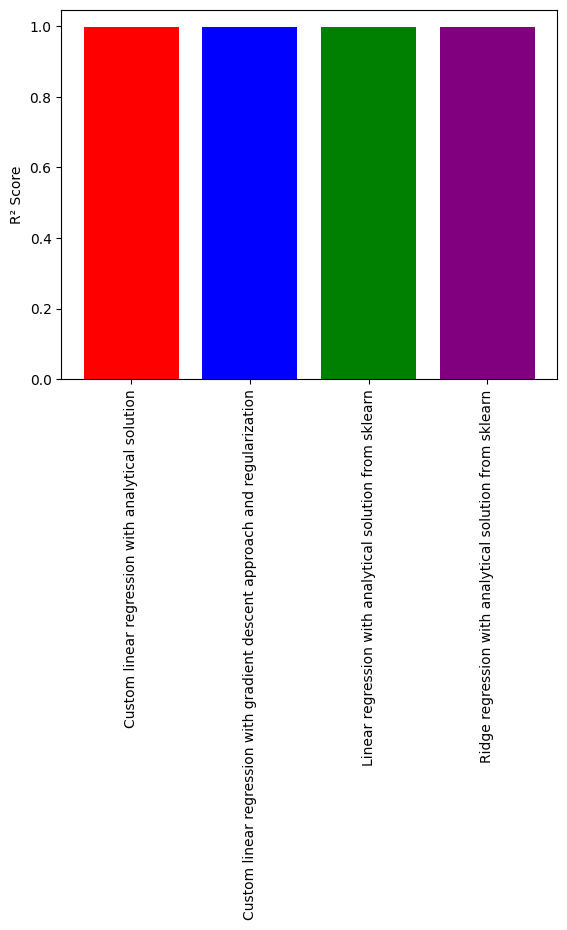

In [94]:
plt.bar(score_dict.keys(), score_dict.values(), color=["red", "blue", "green", "purple"])
plt.ylabel("R² Score")
plt.xticks(rotation=90)
plt.show()

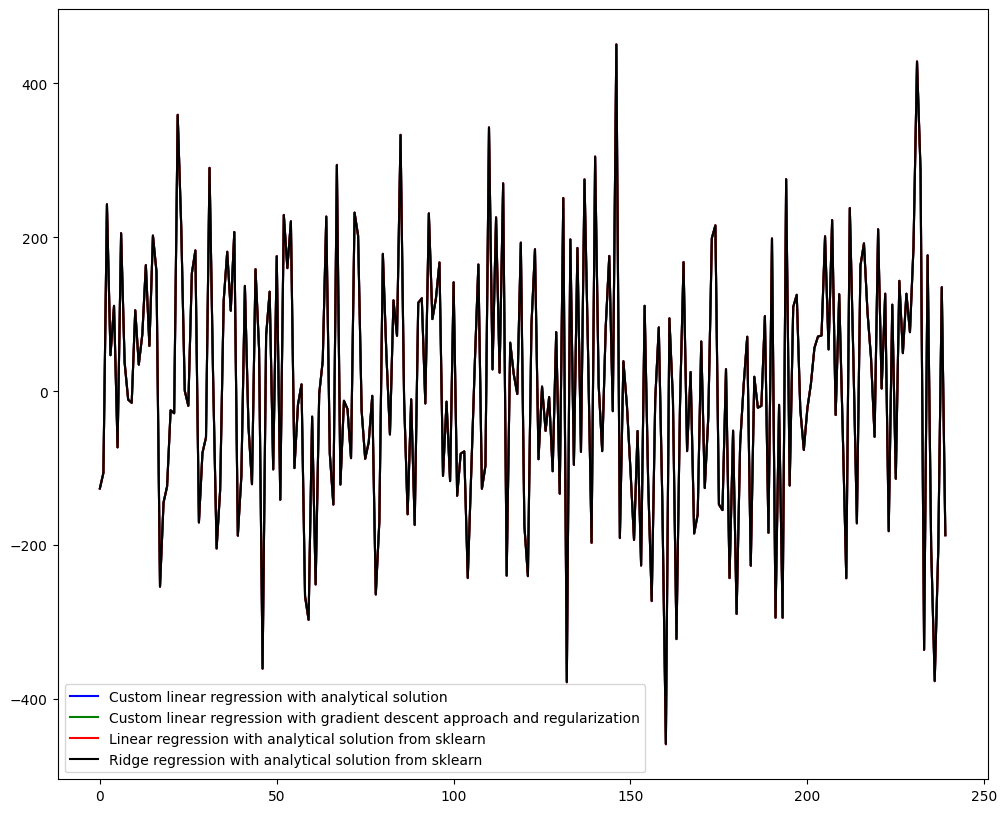

In [95]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot([x for x in range(len(y_pred1))], y_pred1, color="b", label="Custom linear regression with analytical solution")
plt.plot([x for x in range(len(y_pred2))], y_pred2, color="g", label="Custom linear regression with gradient descent approach and regularization")
plt.plot([x for x in range(len(y_pred3))], y_pred3, color="r", label="Linear regression with analytical solution from sklearn")
plt.plot([x for x in range(len(y_pred4))], y_pred4, color="k", label="Ridge regression with analytical solution from sklearn")
plt.legend()
plt.show()